<a href="https://colab.research.google.com/github/arsalanmubeen/IBA/blob/main/CNN_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part I:

CIFAR: http://www.cs.toronto.edu/~kriz/cifar.html

Fashion-MNIST: https://github.com/zalandoresearch/fashion-mnist

# import libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D ,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import KFold

from tensorflow.keras.datasets import cifar10 ,fashion_mnist # To load the DataSET
from tensorflow.keras.utils import to_categorical # To transforn labels in Categorical


from matplotlib import pyplot
import numpy as np

from statistics import mean
import os

In [ ]:
def load_dataset_example(load_data):
   # load dataset
   load_data=load_data
   (trainX, trainy), (testX, testy) = load_data
    # summarize loaded dataset
   print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
   print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
    # plot first few images
   for i in range(9):
    	# define subplot
    	pyplot.subplot(330 + 1 + i)
    	# plot raw pixel data
    	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
    # show the figure
   pyplot.show()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


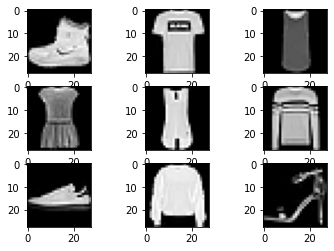

In [ ]:
load_dataset_example(fashion_mnist.load_data())

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


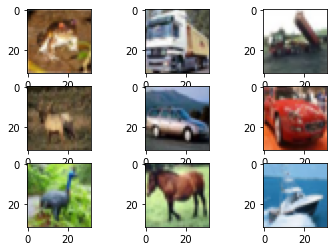

In [ ]:
load_dataset_example(cifar10.load_data())

In [ ]:
# load train and test dataset
def load_dataset(load_data,ModelGO = 0):
	# load dataset
	(trainX, trainY), (testX, testY) = load_data
	# reshape dataset to have a single channel
	if ModelGO == 0:
	 trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
	 testX = testX.reshape(testX.shape[0], 28, 28, 1)
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [ ]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# # Normalize pixel values to be between 0 and 1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm



1.   I are using the Sequential Model, we are adding layer after the layer
2.   add a convolutional layer 3 x 3
1.   Run the activation fuction with RELU
2.   I add some drop out because it's easy to remove overfitting by usig that we can get good Acc
1.    add Flatten because the output og the MaxPooling in not in one dimention vactor
2.   then i add 100 or 128 Neurons in Dense layer.
1.   then i add 10 i have 10 number of classes Neurons in Dense layer.
2.   learning_rate toword th goal for now 0.01
1.   Data K-fold set to 5 ( in eash itration the epochs set to 10 to get fast result) nested loop
2.   number of batch_size from the data of east K-Flod set to 32












In [ ]:
# define cnn model
def define_model_Fashion():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Dropout(0.2))
 model.add(Flatten())
 model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dropout(0.2))
 model.add(Dense(10, activation='softmax'))
 # compile model
 opt = SGD(learning_rate=0.01, momentum=0.9)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 return model

In [ ]:
# define cnn model
def define_model_CIFAR():
 model = Sequential() # we 
 model.add(Dropout(0.2))
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dropout(0.2))
 model.add(Dense(10, activation='softmax'))
 # compile model
 opt = SGD(learning_rate=0.001, momentum=0.9)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 return model

In [ ]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5 ,ModelGO=0):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		if ModelGO == 0:
		  model = define_model_Fashion()
		else:
			model = define_model_CIFAR()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('Aaccuracy :  > %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

In [ ]:
# run the test harness for evaluating a model
def run_test_harness(load_data ,ModelGO):
	# load dataset
	trainX, trainY, testX, testY = load_dataset(load_data,ModelGO)
	# prepare pixel data
	trainX, testX = prep_pixels(trainX[:400], testX[:200]) # take a reduced number of images for which you can acquire results quickly
	# evaluate model
	scores, histories = evaluate_model(trainX ,trainY[:400],5,ModelGO)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, np.std(scores)*100, len(scores)))

Aaccuracy :  > 62.500
Aaccuracy :  > 85.000
Aaccuracy :  > 75.000
Aaccuracy :  > 66.250
Aaccuracy :  > 73.750


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


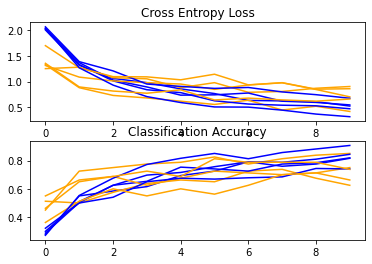

Accuracy: mean=72.500 std=7.786, n=5


In [ ]:
# entry point, run the test harness
run_test_harness(fashion_mnist.load_data(),0)

Aaccuracy :  > 18.750
Aaccuracy :  > 23.750
Aaccuracy :  > 17.500
Aaccuracy :  > 15.000
Aaccuracy :  > 15.000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


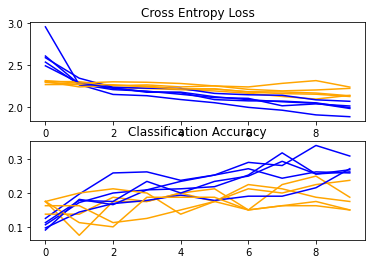

Accuracy: mean=18.000 std=3.221, n=5


In [ ]:
run_test_harness(cifar10.load_data(),1)

## Part II:

Face DS1: https://www.kaggle.com/ciplab/real-and-fake-face-detection

In [ ]:
pip install tqdm

In [ ]:
from tqdm import tqdm
import cv2
from random import shuffle
import pandas as pd

Donload data dirctly from Kaggle

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d ciplab/real-and-fake-face-detection

real-and-fake-face-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip /content/real-and-fake-face-detection.zip

Archive:  /content/real-and-fake-face-detection.zip
replace real_and_fake_face/training_fake/easy_100_1111.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace real_and_fake_face/training_fake/easy_101_0010.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace real_and_fake_face/training_fake/easy_102_0101.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace real_and_fake_face/training_fake/easy_103_1111.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: real_and_fake_face/training_fake/easy_103_1111.jpg  
replace real_and_fake_face/training_fake/easy_104_1000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: real_and_fake_face/training_fake/easy_104_1000.jpg  
replace real_and_fake_face/training_fake/easy_105_1100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: real_and_fake_face/training_fake/easy_105_1100.jpg  
replace real_and_fake_face/training_fake/easy_106_0011.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace real_and_fake

In [ ]:
real = "/content/real_and_fake_face/training_real/"
fake = "/content/real_and_fake_face/training_fake/"
#we're creating a list of real and fake images
real_path = os.listdir(real)
fake_path = os.listdir(fake)

print(len(real_path))
print(len(fake_path))

1081
960


In [ ]:
img_size = int(128)
def create_training_data():
  training_data = []
  y=[]
  for img in tqdm(real_path[:981]):
   path = os.path.join(real, img)
    # label = [1] 
   image = cv2.resize( cv2.imread(path), (img_size,img_size) )
   training_data.append(np.array(image))
   y.append(1)
        
  for img in tqdm(fake_path[:860]):
   path = os.path.join(fake, img)
   #label = [0] 
   image = cv2.resize(cv2.imread(path), (img_size,img_size))
   training_data.append(np.array(image))  
   y.append(0)

  return(tuple(training_data),tuple(y))

In [ ]:
def create_test_data():
    test_data = []
    output_data=[]
    for img in tqdm(real_path[981:]):
        path = os.path.join(real, img)
        image = cv2.resize( cv2.imread(path), (img_size,img_size) )
        test_data.append(np.array(image))
        output_data.append(1)
        
    for img in tqdm(fake_path[860:]):
        path = os.path.join(fake, img)
        image = cv2.resize(cv2.imread(path), (img_size,img_size))
        test_data.append(np.array(image))
        output_data.append(0)

    return(tuple(test_data),tuple(output_data))

In [ ]:
X_train,Y_train = create_training_data()
X_test,Y_test= create_test_data()

100%|██████████| 100/100 [00:01<00:00, 78.69it/s]


In [ ]:
l=list(zip(X_train,Y_train))
shuffle(l)
X_train,Y_train=zip(*l)

In [ ]:
# print(X[0].reshape(-1, 50, 50, 1))
X_train = np.array(X_train)

#divide by 255 to squish values to 0 - 1 normalization
X_train = X_train/255.0
Y_train=np.array(Y_train)


X_test = np.array(X_test)

#divide by 255 to squish values to 0 - 1 normalization
X_test = X_test/255.0
Y_test=np.array(Y_test)

In [ ]:
print(X_train.shape[1:])
print(X_train.shape[:])
#checking shape of array to confirm
# print(len(y))

(128, 128, 3)
(1841, 128, 128, 3)


In [ ]:
df=pd.DataFrame(Y_train)
df[0].value_counts()

1    981
0    860
Name: 0, dtype: int64

(128, 128, 3)

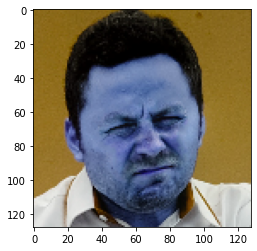

In [ ]:
pyplot.imshow(X_train[1])
X_train[1].shape

what effect does increasing to 2 (C+P) layers has on the performance?

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=X_train.shape[1:]))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten()) 

model.add(Dense(128,activation='relu',kernel_regularizer='l2'))
model.add(Dense(1, activation='softmax'))

In [ ]:

opt = SGD(lr=0.001, momentum=0.9)

model.compile(loss = "binary_crossentropy", optimizer =opt, metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
5/5 [==============================] - 25s 5s/step - loss: 10.0413 - accuracy: 0.5063 - val_loss: 9.5524 - val_accuracy: 0.5375
Epoch 2/5
5/5 [==============================] - 25s 5s/step - loss: 9.8457 - accuracy: 0.5188 - val_loss: 9.5474 - val_accuracy: 0.5375
Epoch 3/5
5/5 [==============================] - 25s 5s/step - loss: 9.5520 - accuracy: 0.5375 - val_loss: 9.5424 - val_accuracy: 0.5375
Epoch 4/5
5/5 [==============================] - 25s 5s/step - loss: 9.9282 - accuracy: 0.5125 - val_loss: 9.5374 - val_accuracy: 0.5375
Epoch 5/5
5/5 [==============================] - 25s 5s/step - loss: 10.1670 - accuracy: 0.4969 - val_loss: 9.5325 - val_accuracy: 0.5375


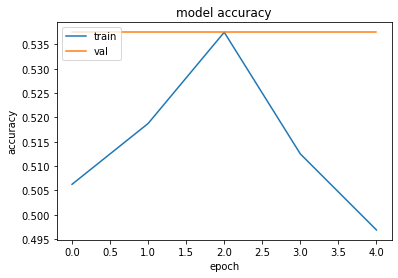

In [ ]:
history=model.fit(X_train[:400],Y_train[:400], batch_size = 64, epochs = 5, validation_split = 0.2)
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.show()

Adding more layers will help you to extract more features. But we can do that upto a certain extent. There is a limit. After that, instead of extracting features, we tend to ‘overfit’ the data. Overfitting can lead to errors in some or the other form like false positives.

 What happens to performance when I add and remove dropout? (Use 1 C+P)

In [ ]:
def define_model_face_detection():
 model = Sequential() # we 
 
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=X_train.shape[1:]))
 model.add(Conv2D(364, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Dropout(0.2))
 model.add(Flatten())
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dropout(0.2))
 model.add(Dense(1, activation='softmax'))
 # compile model
 opt = SGD(learning_rate=0.001, momentum=0.9)
 model.compile(loss = "binary_crossentropy", optimizer =opt, metrics = ['accuracy'])
 return model

In [ ]:
def define_model_face_detection_NOdropOut():
 model = Sequential() # we 
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=X_train.shape[1:]))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(1, activation='softmax'))
 # compile model
 opt = SGD(learning_rate=0.001, momentum=0.9)
 model.compile(loss = "binary_crossentropy", optimizer =opt, metrics = ['accuracy'])
 return model

Epoch 1/5
3/3 [==============================] - 79s 25s/step - loss: 19.8106 - accuracy: 0.5375 - val_loss: 3.9122 - val_accuracy: 0.4500
Epoch 2/5
3/3 [==============================] - 78s 25s/step - loss: 2.2910 - accuracy: 0.5375 - val_loss: 0.7459 - val_accuracy: 0.4500
Epoch 3/5
3/3 [==============================] - 77s 24s/step - loss: 0.7349 - accuracy: 0.5375 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 4/5
3/3 [==============================] - 76s 24s/step - loss: 0.6931 - accuracy: 0.5375 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 5/5
3/3 [==============================] - 77s 24s/step - loss: 0.6931 - accuracy: 0.5375 - val_loss: 0.6932 - val_accuracy: 0.4500


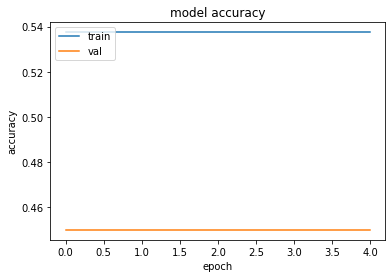

In [ ]:

model = define_model_face_detection()

history=model.fit(X_train[:200],Y_train[:200], batch_size = 64, epochs = 5, validation_split = 0.2)
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.show()

Epoch 1/5
5/5 [==============================] - 36s 7s/step - loss: 1.6508 - accuracy: 0.5031 - val_loss: 1.0177 - val_accuracy: 0.6250
Epoch 2/5
5/5 [==============================] - 36s 7s/step - loss: 0.7596 - accuracy: 0.5031 - val_loss: 0.6946 - val_accuracy: 0.6250
Epoch 3/5
5/5 [==============================] - 36s 7s/step - loss: 0.6921 - accuracy: 0.5031 - val_loss: 0.6923 - val_accuracy: 0.6250
Epoch 4/5
5/5 [==============================] - 36s 7s/step - loss: 0.6923 - accuracy: 0.5031 - val_loss: 0.6936 - val_accuracy: 0.6250
Epoch 5/5
5/5 [==============================] - 36s 7s/step - loss: 0.6917 - accuracy: 0.5031 - val_loss: 0.6941 - val_accuracy: 0.6250


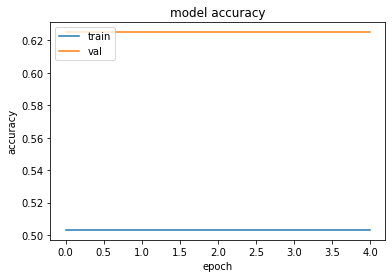

In [ ]:

model = define_model_face_detection_NOdropOut()
history=model.fit(X_train[:400],Y_train[:400], batch_size = 64, epochs = 5, validation_split = 0.2)
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.show()

when i remove the dropout it took less time to learn  but woth drop out shows up the good ACC

**What happens to performance when I add and remove Batch Normalization? (Use 1 C+P)**

Epoch 1/5
5/5 [==============================] - 37s 7s/step - loss: 7.7607 - accuracy: 0.4969 - val_loss: 1.3945 - val_accuracy: 0.6250
Epoch 2/5
5/5 [==============================] - 37s 7s/step - loss: 7.7607 - accuracy: 0.4969 - val_loss: 1.1587 - val_accuracy: 0.6250
Epoch 3/5
5/5 [==============================] - 36s 7s/step - loss: 7.7607 - accuracy: 0.4969 - val_loss: 1.0282 - val_accuracy: 0.6250
Epoch 4/5
5/5 [==============================] - 36s 7s/step - loss: 7.7607 - accuracy: 0.4969 - val_loss: 0.9413 - val_accuracy: 0.6250
Epoch 5/5
5/5 [==============================] - 36s 7s/step - loss: 7.7607 - accuracy: 0.4969 - val_loss: 0.8783 - val_accuracy: 0.6250


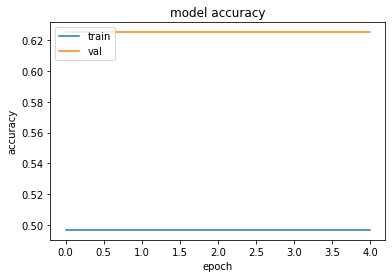

In [ ]:
model = define_model_face_detection_NOdropOut()
model.add(BatchNormalization())
history=model.fit(X_train[:400],Y_train[:400], batch_size = 64, epochs = 5, validation_split = 0.2)
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.show()

drop out the ACC

**What happens to performance when I use valid and same paddings? (Use 1 C+P)**

Padding is used on the convolutional layers to ensure the height and width of the output feature maps matches the inputs.

In [ ]:
def define_model_face_detection_NOdropOut_VoidPading():
 model = Sequential() # we 
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid', input_shape=X_train.shape[1:]))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(1, activation='softmax'))
 # compile model
 opt = SGD(learning_rate=0.001, momentum=0.9)
 model.compile(loss = "binary_crossentropy", optimizer =opt, metrics = ['accuracy'])
 return model

For Same Padding

Epoch 1/5
5/5 [==============================] - 37s 7s/step - loss: 1.5301 - accuracy: 0.5031 - val_loss: 0.6751 - val_accuracy: 0.6250
Epoch 2/5
5/5 [==============================] - 36s 7s/step - loss: 0.6922 - accuracy: 0.5031 - val_loss: 0.6793 - val_accuracy: 0.6250
Epoch 3/5
5/5 [==============================] - 36s 7s/step - loss: 0.6921 - accuracy: 0.5031 - val_loss: 0.6829 - val_accuracy: 0.6250
Epoch 4/5
5/5 [==============================] - 36s 7s/step - loss: 0.6896 - accuracy: 0.5031 - val_loss: 0.6906 - val_accuracy: 0.6250
Epoch 5/5
5/5 [==============================] - 36s 7s/step - loss: 0.6862 - accuracy: 0.5031 - val_loss: 0.6833 - val_accuracy: 0.6250


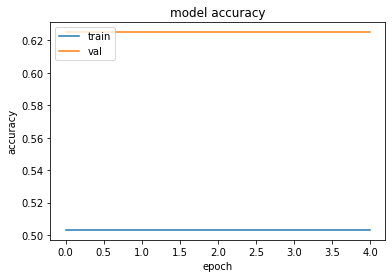

In [ ]:
model = define_model_face_detection_NOdropOut()
history=model.fit(X_train[:400],Y_train[:400], batch_size = 64, epochs = 5, validation_split = 0.2)
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.show()

For VAlid Padding

Epoch 1/5
5/5 [==============================] - 34s 7s/step - loss: 0.9870 - accuracy: 0.5031 - val_loss: 0.6794 - val_accuracy: 0.6250
Epoch 2/5
5/5 [==============================] - 34s 7s/step - loss: 0.7314 - accuracy: 0.5031 - val_loss: 0.7014 - val_accuracy: 0.6250
Epoch 3/5
5/5 [==============================] - 34s 7s/step - loss: 0.6861 - accuracy: 0.5031 - val_loss: 0.6885 - val_accuracy: 0.6250
Epoch 4/5
5/5 [==============================] - 34s 7s/step - loss: 0.6822 - accuracy: 0.5031 - val_loss: 0.7000 - val_accuracy: 0.6250
Epoch 5/5
5/5 [==============================] - 34s 7s/step - loss: 0.6797 - accuracy: 0.5031 - val_loss: 0.6924 - val_accuracy: 0.6250


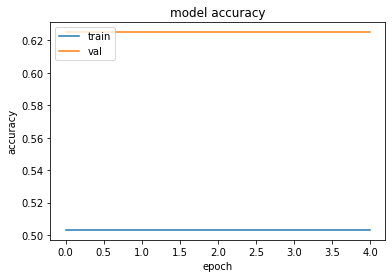

In [ ]:
model = define_model_face_detection_NOdropOut_VoidPading()
history=model.fit(X_train[:400],Y_train[:400], batch_size = 64, epochs = 5, validation_split = 0.2)
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.show()

**What happens to performance when I increase number of filters? (Use 1 C+P)**

the convolutional layer can often improve performance, as it can provide more opportunity for extracting simple features from the input images.

In [ ]:
def define_model_face_detection_NOdropOut_increasefilters():
 model = Sequential() # we 
 model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=X_train.shape[1:]))
 model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(1, activation='softmax'))
 # compile model
 opt = SGD(learning_rate=0.001, momentum=0.9)
 model.compile(loss = "binary_crossentropy", optimizer =opt, metrics = ['accuracy'])
 return model

Epoch 1/5
5/5 [==============================] - 111s 23s/step - loss: 4.0820 - accuracy: 0.5031 - val_loss: 1.0905 - val_accuracy: 0.6250
Epoch 2/5
5/5 [==============================] - 110s 22s/step - loss: 0.7130 - accuracy: 0.5031 - val_loss: 0.6687 - val_accuracy: 0.6250
Epoch 3/5
5/5 [==============================] - 110s 22s/step - loss: 0.6948 - accuracy: 0.5031 - val_loss: 0.6814 - val_accuracy: 0.6250
Epoch 4/5
5/5 [==============================] - 109s 22s/step - loss: 0.6905 - accuracy: 0.5031 - val_loss: 0.6929 - val_accuracy: 0.6250
Epoch 5/5
5/5 [==============================] - 109s 22s/step - loss: 0.6852 - accuracy: 0.5031 - val_loss: 0.6914 - val_accuracy: 0.6250


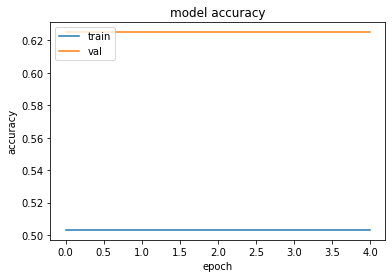

In [ ]:
model = define_model_face_detection_NOdropOut_increasefilters()
history=model.fit(X_train[:400],Y_train[:400], batch_size = 64, epochs = 5, validation_split = 0.2)
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.show()

**What happens to performance when I use different pooling sizes? (Use 1 C+P and total 2 filter sizes only)**

In [ ]:
def define_model_face_detection_NOdropOut_pooling():
 model = Sequential() # we 
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=X_train.shape[1:]))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((1, 1)))
 model.add(Flatten())
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(1, activation='softmax'))
 # compile model
 opt = SGD(learning_rate=0.001, momentum=0.9)
 model.compile(loss = "binary_crossentropy", optimizer =opt, metrics = ['accuracy'])
 return model

Epoch 1/5
5/5 [==============================] - 43s 9s/step - loss: 1.0480 - accuracy: 0.5031 - val_loss: 0.6843 - val_accuracy: 0.6250
Epoch 2/5
5/5 [==============================] - 42s 9s/step - loss: 0.6941 - accuracy: 0.5031 - val_loss: 0.6818 - val_accuracy: 0.6250
Epoch 3/5
5/5 [==============================] - 43s 9s/step - loss: 0.6895 - accuracy: 0.5031 - val_loss: 0.6964 - val_accuracy: 0.6250
Epoch 4/5
5/5 [==============================] - 43s 9s/step - loss: 0.6793 - accuracy: 0.5031 - val_loss: 0.6753 - val_accuracy: 0.6250
Epoch 5/5
5/5 [==============================] - 43s 9s/step - loss: 0.6621 - accuracy: 0.5031 - val_loss: 0.6682 - val_accuracy: 0.6250


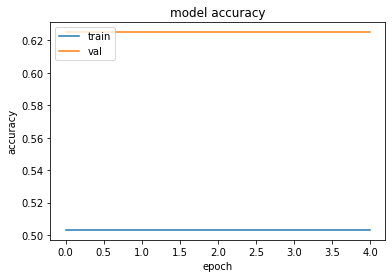

In [ ]:
model = define_model_face_detection_NOdropOut_pooling()
history=model.fit(X_train[:400],Y_train[:400], batch_size = 64, epochs = 5, validation_split = 0.2)
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.show()

**Is there a difference in performance if I use ReLU or Leaky Relu? (Use 1 C+P)**

In [ ]:
def define_model_face_detection_NOdropOut_activation():
 model = Sequential() # we 
 model.add(Conv2D(64, (3, 3), activation='LeakyReLU', kernel_initializer='he_uniform', padding='same', input_shape=X_train.shape[1:]))
 model.add(Conv2D(64, (3, 3), activation='LeakyReLU', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(128, activation='LeakyReLU', kernel_initializer='he_uniform'))
 model.add(Dense(1, activation='softmax'))
 # compile model
 opt = SGD(learning_rate=0.001, momentum=0.9)
 model.compile(loss = "binary_crossentropy", optimizer =opt, metrics = ['accuracy'])
 return model

Epoch 1/5
5/5 [==============================] - 38s 8s/step - loss: 1.8631 - accuracy: 0.5031 - val_loss: 0.7588 - val_accuracy: 0.6250
Epoch 2/5
5/5 [==============================] - 37s 8s/step - loss: 0.9869 - accuracy: 0.5031 - val_loss: 0.6386 - val_accuracy: 0.6250
Epoch 3/5
5/5 [==============================] - 38s 8s/step - loss: 0.6429 - accuracy: 0.5031 - val_loss: 0.6422 - val_accuracy: 0.6250
Epoch 4/5
5/5 [==============================] - 38s 8s/step - loss: 0.5958 - accuracy: 0.5031 - val_loss: 0.6778 - val_accuracy: 0.6250
Epoch 5/5
5/5 [==============================] - 37s 8s/step - loss: 0.5892 - accuracy: 0.5031 - val_loss: 0.6369 - val_accuracy: 0.6250


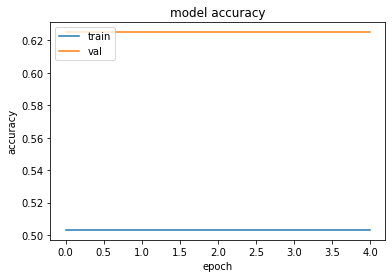

In [ ]:
model = define_model_face_detection_NOdropOut_activation()
history=model.fit(X_train[:400],Y_train[:400], batch_size = 64, epochs = 5, validation_split = 0.2)
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.show()

 **Is there a difference in performance if I change stride from 1 to 2? (Use 1 C+P)**

In [ ]:
def define_model_face_detection_NOdropOut_stride():
 model = Sequential() # we 
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=X_train.shape[1:]))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2), strides=2))
 model.add(Flatten())
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(1, activation='softmax'))
 # compile model
 opt = SGD(learning_rate=0.001, momentum=0.9)
 model.compile(loss = "binary_crossentropy", optimizer =opt, metrics = ['accuracy'])
 return model

Epoch 1/5
5/5 [==============================] - 37s 7s/step - loss: 0.8830 - accuracy: 0.5031 - val_loss: 0.6897 - val_accuracy: 0.6250
Epoch 2/5
5/5 [==============================] - 36s 7s/step - loss: 0.6922 - accuracy: 0.5031 - val_loss: 0.6695 - val_accuracy: 0.6250
Epoch 3/5
5/5 [==============================] - 36s 7s/step - loss: 0.6700 - accuracy: 0.5031 - val_loss: 0.6459 - val_accuracy: 0.6250
Epoch 4/5
5/5 [==============================] - 36s 7s/step - loss: 0.6644 - accuracy: 0.5031 - val_loss: 0.7154 - val_accuracy: 0.6250
Epoch 5/5
5/5 [==============================] - 36s 7s/step - loss: 0.6456 - accuracy: 0.5031 - val_loss: 0.6507 - val_accuracy: 0.6250


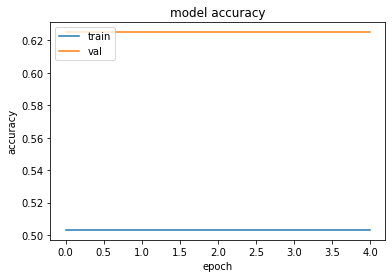

In [ ]:
model = define_model_face_detection_NOdropOut_stride()
history=model.fit(X_train[:400],Y_train[:400], batch_size = 64, epochs = 5, validation_split = 0.2)
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.show()